<h2> Kinetics <i>Actinobacillus succinogenes</i> </h2>

<p>Replicate from (Vlysidis et al., 2011)<p>

In [29]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#plt.style.use("fivethirtyeight")

In [3]:
## Formato
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = "serif"

In [98]:
#Monod Kinetics MODIFICADA
def monod_rate(C,t):
    
    #Vector de concentración: 
    cX = C[0]
    cAS = C[1]
    cAF = C[2]
    cAA = C[3]
    cS = C[4]
    cqs = C[5]
    cqP = C[6]
    cqX = C[7]
    
    
    #Constantes cinéticas
    aSA=9.864
    bSA=0.001
    aAF=0.428
    bAF=0.002
    aAA=0.753
    bAA=0.001
    mumax=0.12;
    Ks=2.896;
    Ki=15.36
    n=1.074
    Yx=0.130
    Ysa=2.790
    ms=0.001
    Psa=45.6

    mu = mumax*((cS)/(cS+Ks+((cS**2)/Ki)))
    
    rX = mu*cX
    rAS = aSA*rX + bSA*cX
    rAF = aAF*rX + bAF*cX
    rAA = aAA*rX + bAA*cX
    rS = -(1/Yx)*(rX)-(ms*cX)-((1/Ysa)*rAS)
    rqs = -rS / cX
    rqP = rAS / cX
    rqX = rX / cX
    
    dC = np.array([rX,rAS,rAF,rAA,rS,rqs,rqP,rqX])
    return dC

#Feed point
Cf = np.array([0.25,0,0,0,36.4,0,0,0])

In [99]:
t_end = 120
N_pts = 500
ts = np.logspace(-4,np.log10(t_end),N_pts)
Cs = odeint(monod_rate,Cf,ts)

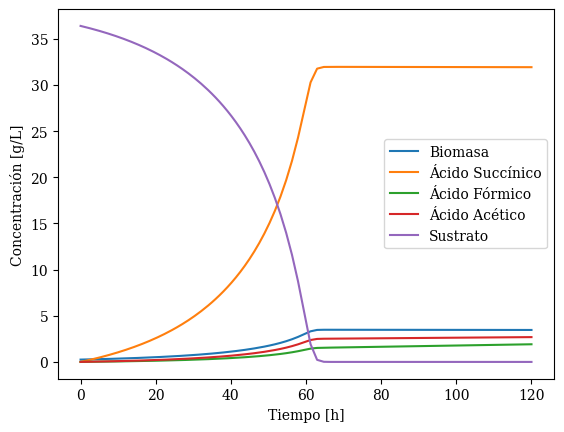

In [84]:
plt.plot(ts, Cs[:,0], label="Biomasa")
plt.plot(ts, Cs[:,1], label="Ácido Succínico")
plt.plot(ts, Cs[:,2], label="Ácido Fórmico")
plt.plot(ts, Cs[:,3], label="Ácido Acético")
plt.plot(ts, Cs[:,4], label="Sustrato")

plt.xlabel('Tiempo [h]', fontsize=10)
plt.ylabel('Concentración [g/L]', fontsize=10)
plt.legend()
#plt.savefig('Fig1.png', dpi=300)
plt.show()

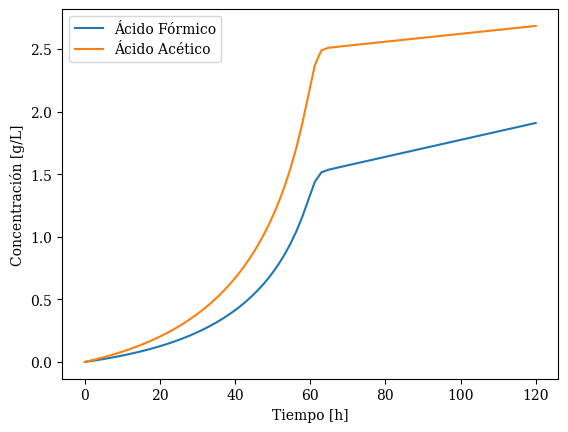

In [85]:
plt.plot(ts, Cs[:,2], label="Ácido Fórmico")
plt.plot(ts, Cs[:,3], label="Ácido Acético")

plt.xlabel('Tiempo [h]', fontsize=10)
plt.ylabel('Concentración [g/L]', fontsize=10)
plt.legend()
#plt.savefig('Fig2.png', dpi=300)
plt.show()

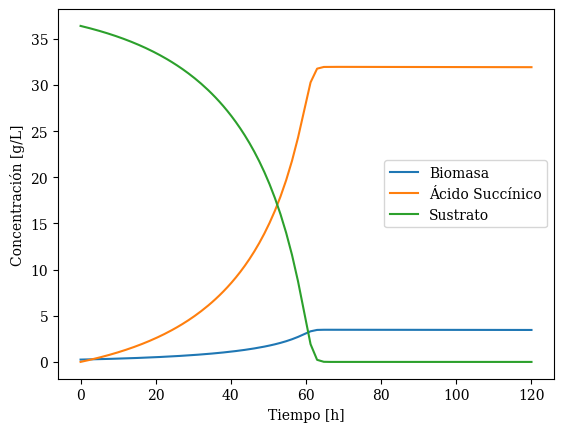

In [86]:
plt.plot(ts, Cs[:,0], label="Biomasa")
plt.plot(ts, Cs[:,1], label="Ácido Succínico")
plt.plot(ts, Cs[:,4], label="Sustrato")

plt.xlabel('Tiempo [h]', fontsize=10)
plt.ylabel('Concentración [g/L]', fontsize=10)
plt.legend()
#plt.savefig('Fig3.png', dpi=300)
plt.show()

In [14]:
pwd

'C:\\Users\\Andre\\Downloads'

### Consumo y Producción específica

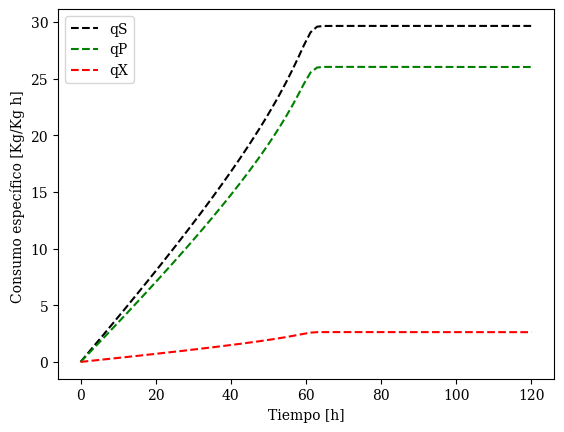

In [106]:
plt.plot(ts, Cs[:,5], 'k--',label="qS")
plt.plot(ts, Cs[:,6], 'g--',label="qP")
plt.plot(ts, Cs[:,7], 'r--',label="qX")

plt.xlabel('Tiempo [h]', fontsize=10)
plt.ylabel('Consumo específico [Kg/Kg h] ', fontsize=10)
plt.legend()
#plt.savefig('Fig4.png', dpi=300)
plt.show()

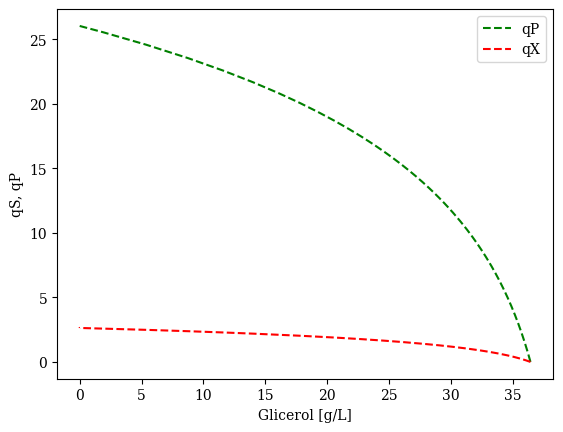

In [107]:
plt.plot(Cs[:,4], Cs[:,6], 'g--',label="qP")
plt.plot(Cs[:,4], Cs[:,7], 'r--',label="qX")

plt.xlabel('Glicerol [g/L]', fontsize=10)
plt.ylabel('qS, qP', fontsize=10)
plt.legend()
#plt.savefig('Fig5.png', dpi=300)
plt.show()

<h2>Reference</h2>
<p>Vlysidis, A., Binns, M., Webb, C., Theodoropoulos, C., 2011. Glycerol utilisation for the production of chemicals: Conversion to succinic acid, a combined experimental and computational study. Biochemical Engineering Journal 58–59, 1–11. https://doi.org/10.1016/j.bej.2011.07.004</p>